### Training DtaSet

### Exploratory Data Analysis (EDA):

In [34]:
#load the Data into DataFrame 
import numpy as np
import pandas as pd 
df =pd.read_csv(r"C:\Users\anura\Desktop\d\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.shape

(891, 12)

In [4]:
#check for missing values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
numerical_col =df.select_dtypes(include =['int64','float64']).columns
numerical_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [7]:
sns.set(style="whitegrid")

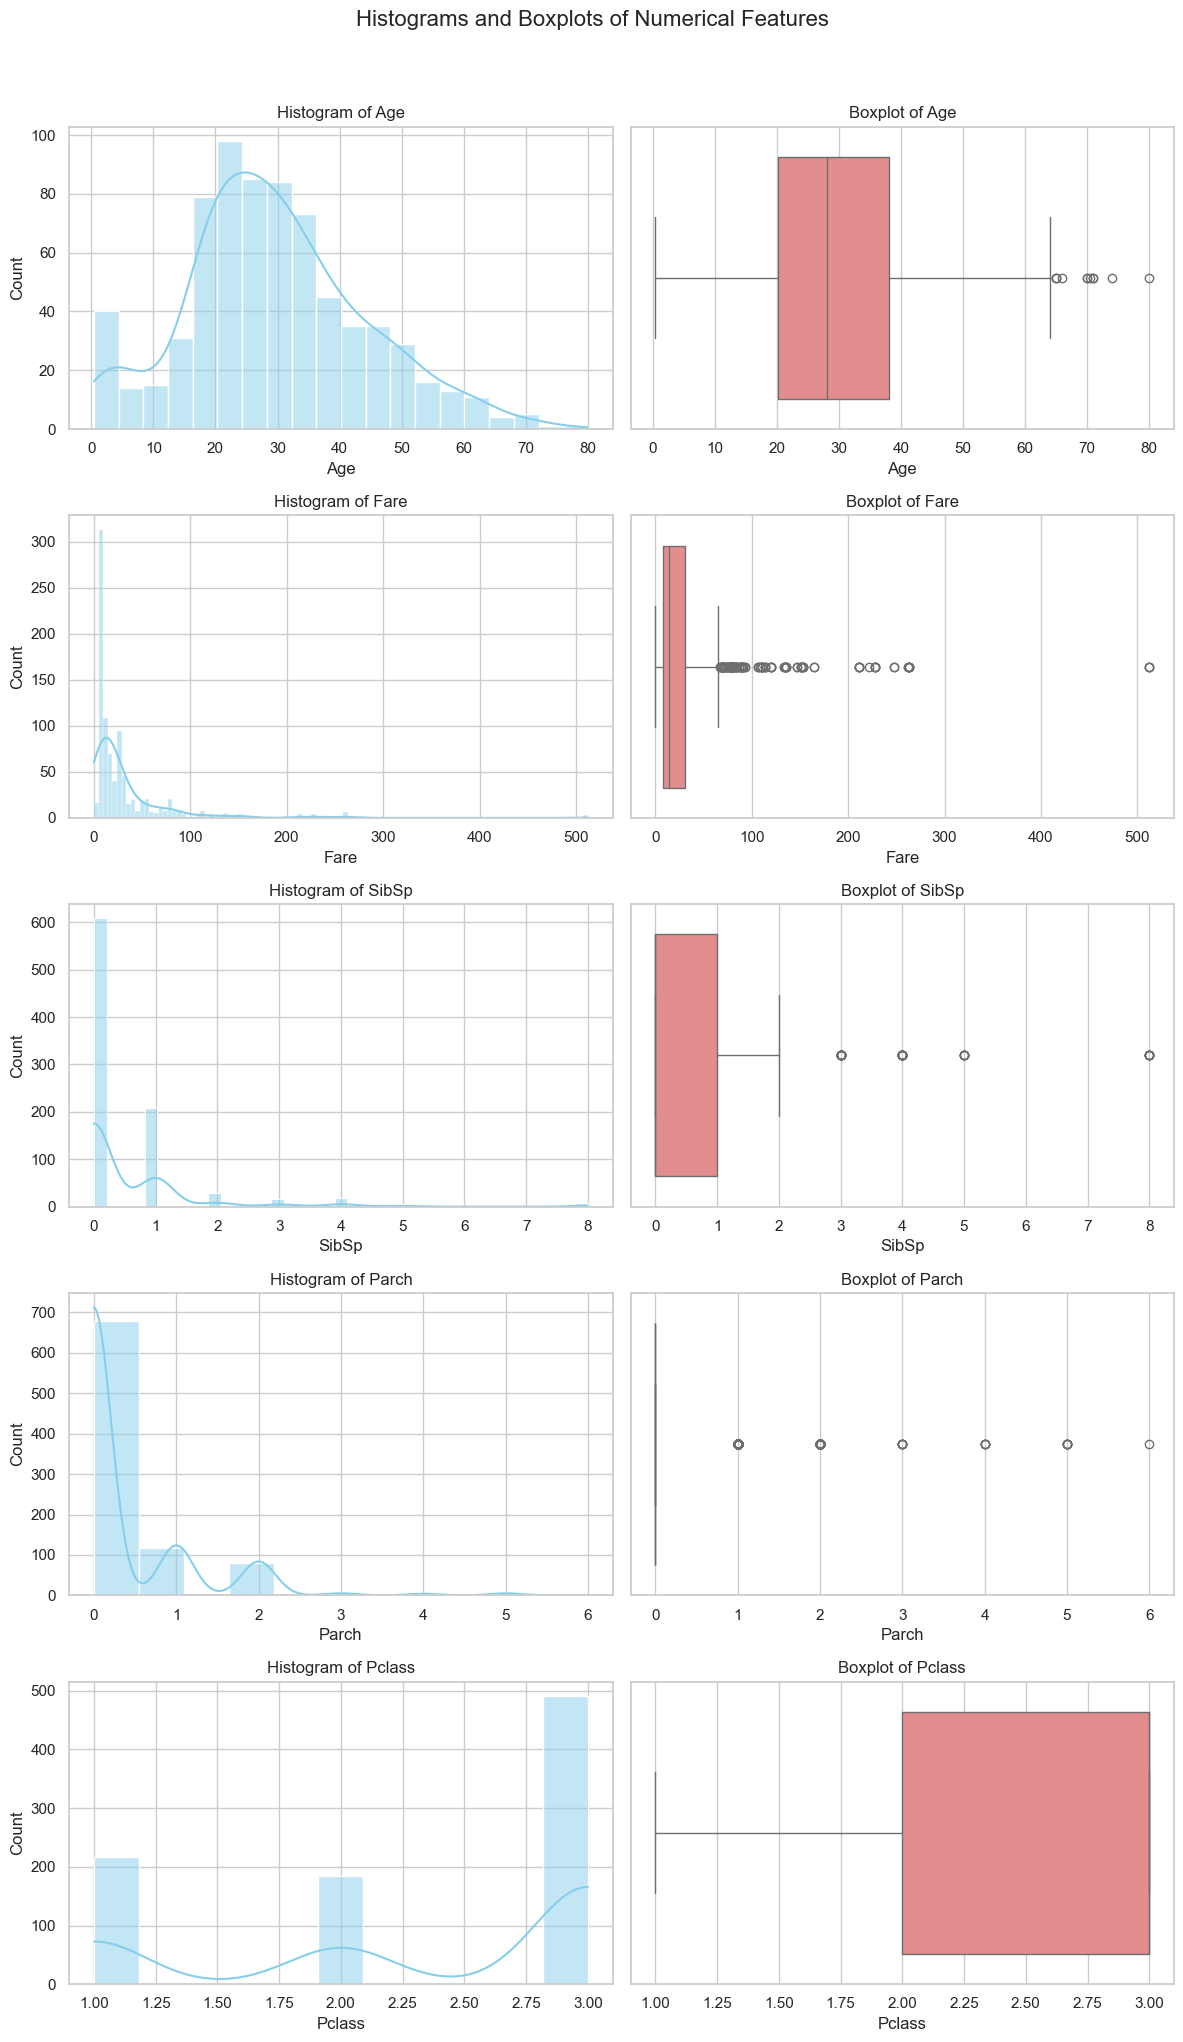

In [8]:
# Numerical columns to visualize
num_cols = ['Age', 'Fare', 'SibSp', 'Parch','Pclass']

# Histograms and boxplots
fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 4 * len(num_cols)))
fig.suptitle("Histograms and Boxplots of Numerical Features", fontsize=16, y=1.02)

for i, col in enumerate(num_cols):
    # Histogram
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"Histogram of {col}")
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


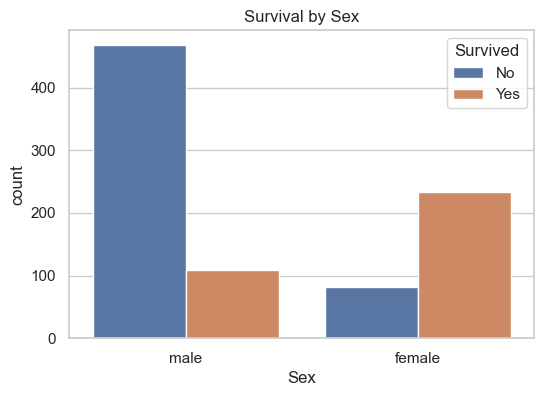

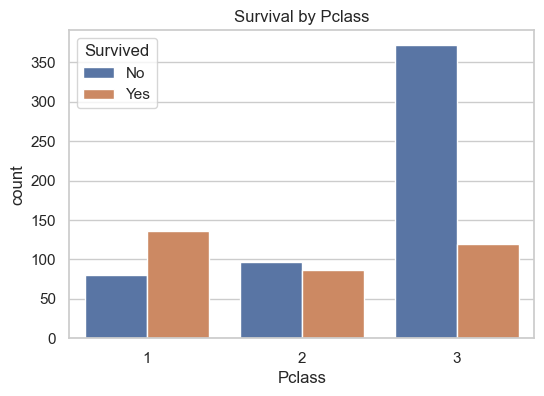

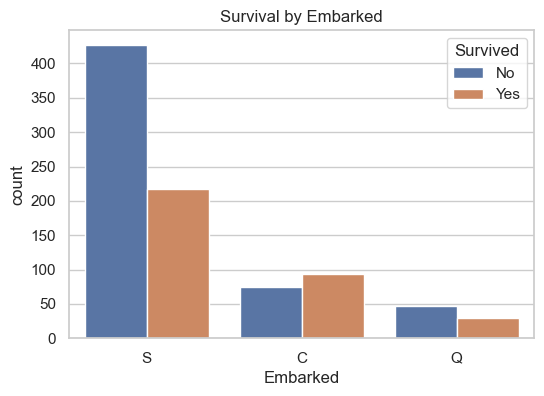

In [9]:
# Bar plots: Survival vs. Sex, Pclass, Embarked
cat_cols = ['Sex', 'Pclass', 'Embarked']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Survived')
    plt.title(f"Survival by {col}")
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.show()


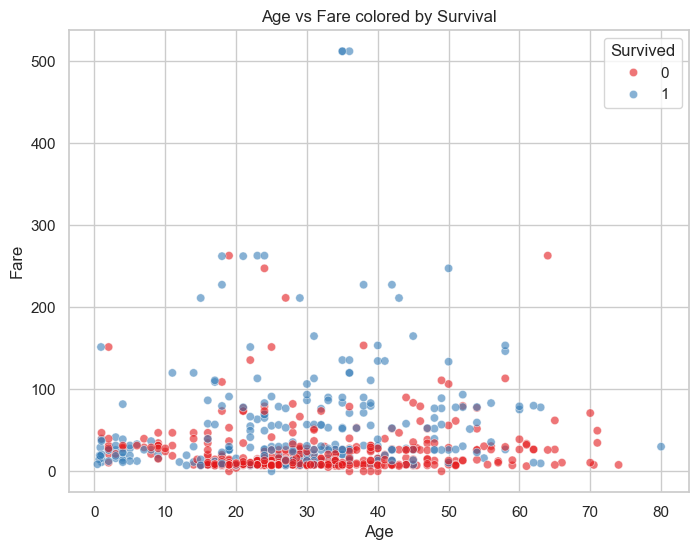

In [10]:
# Scatter plots: Age vs Fare, colored by survival
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='Set1', alpha=0.6)
plt.title("Age vs Fare colored by Survival")
plt.show()

### Data Preprocessing:

In [11]:
#fill missing values with Median or Mean 
df["Age"].fillna(df["Age"].median(), inplace =True)

C:\Users\anura\AppData\Local\Temp\ipykernel_24032\2887508416.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace =True)


In [12]:
categorical_col =df.select_dtypes(include =["object"]).columns
categorical_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [13]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Name"]     =LE.fit_transform(df["Name"])
df["Sex"]      =LE.fit_transform(df["Sex"])
df["Ticket"]   =LE.fit_transform(df["Ticket"])
df["Cabin"]    =LE.fit_transform(df["Cabin"])
df["Embarked"] =LE.fit_transform(df["Embarked"])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [14]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 66.3 KB


### Building Predictive Models:

In [16]:
Y =df["Survived"]
X =df.iloc[:, 2:]
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,108,1,22.0,1,0,523,7.2500,147,2
1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,353,0,26.0,0,0,669,7.9250,147,2
3,1,272,0,35.0,1,0,49,53.1000,55,2
4,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...
886,2,548,1,27.0,0,0,101,13.0000,147,2
887,1,303,0,19.0,0,0,14,30.0000,30,2
888,3,413,0,28.0,1,2,675,23.4500,147,2
889,1,81,1,26.0,0,0,8,30.0000,60,0


In [17]:
#Data  partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X, Y, test_size =0.3)

In [18]:
#model fitting 
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [19]:
y_pred_train =model.predict(X_train)
y_pred_test  =model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

training_accuracy  =accuracy_score(Y_train, y_pred_train)
test_accuracy      =accuracy_score(Y_test, y_pred_test)
print("Training accuracy:", np.round(training_accuracy),2)
print("Test accuracy:", np.round(test_accuracy),2)

training_precision  =precision_score(Y_train, y_pred_train)
test_precision  =precision_score(Y_test, y_pred_test)
print("Training Precision:", np.round(training_precision),2)
print("Test Precision:", np.round(test_precision),2)

training_recall  =recall_score(Y_train, y_pred_train)
test_recall      =recall_score(Y_test, y_pred_test)
print("Training Recall:", np.round(training_recall),2)
print("Test Recall:", np.round(test_recall),2)

training_f1   =f1_score(Y_train, y_pred_train)
test_f1       =f1_score(Y_test, y_pred_test)
print("Traning F1:", np.round(training_f1),2)
print("Test F1:", np.round(test_f1),2)

Training accuracy: 1.0 2
Test accuracy: 1.0 2
Training Precision: 1.0 2
Test Precision: 1.0 2
Training Recall: 1.0 2
Test Recall: 1.0 2
Traning F1: 1.0 2
Test F1: 1.0 2


In [21]:
#gradient boosting classifier 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss

# Fit the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, Y_train)

# Predictions (labels)
y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

# Predictions (probabilities) — for log loss
y_proba_train_gb = gb_model.predict_proba(X_train)
y_proba_test_gb = gb_model.predict_proba(X_test)

# Accuracy
training_accuracy_gb = accuracy_score(Y_train, y_pred_train_gb)
test_accuracy_gb = accuracy_score(Y_test, y_pred_test_gb)

# Log Loss (using probabilities)
training_loss_gb = log_loss(Y_train, y_proba_train_gb)
test_loss_gb = log_loss(Y_test, y_proba_test_gb)

# Output
print("Gradient Boosting - Training Accuracy:", training_accuracy_gb)
print("Gradient Boosting - Test Accuracy:", test_accuracy_gb)
print("Gradient Boosting - Training Loss:", training_loss_gb)
print("Gradient Boosting - Test Loss:", test_loss_gb)

Gradient Boosting - Training Accuracy: 0.9406099518459069
Gradient Boosting - Test Accuracy: 0.8432835820895522
Gradient Boosting - Training Loss: 0.22618725927872713
Gradient Boosting - Test Loss: 0.37010290245035316


In [22]:
##XGBoost models

import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import LabelEncoder

# Encode labels to start from 0 and be integers
le = LabelEncoder()
Y_train_enc = le.fit_transform(Y_train)
Y_test_enc = le.transform(Y_test)

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    gamma=100,
    reg_lambda=10,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, Y_train_enc)

# Predictions (class labels)
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Predictions (probabilities for log_loss)
y_proba_train_xgb = xgb_model.predict_proba(X_train)
y_proba_test_xgb = xgb_model.predict_proba(X_test)

# Accuracy
training_accuracy_xgb = accuracy_score(Y_train_enc, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(Y_test_enc, y_pred_test_xgb)

# Log loss
training_loss_xgb = log_loss(Y_train_enc, y_proba_train_xgb)
test_loss_xgb = log_loss(Y_test_enc, y_proba_test_xgb)

# Output
print("XGBoost - Training Accuracy:", training_accuracy_xgb)
print("XGBoost - Test Accuracy:", test_accuracy_xgb)
print("XGBoost - Training Loss:", training_loss_xgb)
print("XGBoost - Test Loss:", test_loss_xgb)

XGBoost - Training Accuracy: 0.6131621187800963
XGBoost - Test Accuracy: 0.6231343283582089
XGBoost - Training Loss: 0.6071975192083667
XGBoost - Test Loss: 0.6008729098854382


C:\Users\anura\anaconda5-3-25\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:29:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
##adaboost classifier with GradientBoostingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, log_loss

# AdaBoost Classifier
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate=0.1)
ab_model.fit(X_train, Y_train)

# Predicted class labels
y_pred_train_ab = ab_model.predict(X_train)
y_pred_test_ab = ab_model.predict(X_test)

# Predicted probabilities (for log loss)
y_proba_train_ab = ab_model.predict_proba(X_train)
y_proba_test_ab = ab_model.predict_proba(X_test)

# Accuracy scores
training_accuracy_ab = accuracy_score(Y_train, y_pred_train_ab)
test_accuracy_ab = accuracy_score(Y_test, y_pred_test_ab)

# Log loss (correct: using probabilities)
training_loss_ab = log_loss(Y_train, y_proba_train_ab)
test_loss_ab = log_loss(Y_test, y_proba_test_ab)

# Output
print("AdaBoost - Training Accuracy:", training_accuracy_ab)
print("AdaBoost - Test Accuracy:", test_accuracy_ab)
print("AdaBoost - Training Loss:", training_loss_ab)
print("AdaBoost - Test Loss:", test_loss_ab)

C:\Users\anura\anaconda5-3-25\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Training Accuracy: 0.812199036918138
AdaBoost - Test Accuracy: 0.8059701492537313
AdaBoost - Training Loss: 0.6403217193633403
AdaBoost - Test Loss: 0.6396007793244358


In [24]:
#Cross validations

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import numpy as np

training_accuracy = []
test_accuracy     = []
training_loss     = []
test_loss         = []

for i in range(1, 501):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    model = GradientBoostingClassifier()  # Removed 'criterion' parameter
    model.fit(X_train, Y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    y_prob_train = model.predict_proba(X_train)
    y_prob_test  = model.predict_proba(X_test)

    training_accuracy.append(accuracy_score(Y_train, y_pred_train))
    test_accuracy.append(accuracy_score(Y_test, y_pred_test))

    training_loss.append(log_loss(Y_train, y_prob_train))
    test_loss.append(log_loss(Y_test, y_prob_test))

print("Cross validation: Training accuracy score:", np.round(np.mean(training_accuracy), 2))
print("Cross validation: Test accuracy score:",    np.round(np.mean(test_accuracy), 2))
print("Cross validation: Training loss:",          np.round(np.mean(training_loss), 2))
print("Cross validation: Test loss:",              np.round(np.mean(test_loss), 2))


Cross validation: Training accuracy score: 0.93
Cross validation: Test accuracy score: 0.83
Cross validation: Training loss: 0.24
Cross validation: Test loss: 0.4


### Comparative Analysis:

In [25]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels to integers starting from 0
le = LabelEncoder()
Y_train_enc = le.fit_transform(Y_train)
Y_test_enc = le.transform(Y_test)

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    gamma=100,
    reg_lambda=10,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, Y_train_enc)

# Predictions (class labels)
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Accuracy
training_accuracy_xgb = accuracy_score(Y_train_enc, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(Y_test_enc, y_pred_test_xgb)

# Precision
training_precision_xgb = precision_score(Y_train_enc, y_pred_train_xgb)
test_precision_xgb = precision_score(Y_test_enc, y_pred_test_xgb)

# Recall 
training_recall_xgb = recall_score(Y_train_enc, y_pred_train_xgb)
test_recall_xgb = recall_score(Y_test_enc, y_pred_test_xgb)

# Output
print("XGBoost - Training Accuracy:", training_accuracy_xgb)
print("XGBoost - Test Accuracy:", test_accuracy_xgb)
print("XGBoost - Training Precision Score:", training_precision_xgb)
print("XGBoost - Test Precision Score:", test_precision_xgb)
print("XGBoost - Training Recall Score:", training_recall_xgb)
print("XGBoost - Test Recall Score:", test_recall_xgb)


XGBoost - Training Accuracy: 0.6193820224719101
XGBoost - Test Accuracy: 0.6033519553072626
XGBoost - Training Precision Score: 0.0
XGBoost - Test Precision Score: 0.0
XGBoost - Training Recall Score: 0.0
XGBoost - Test Recall Score: 0.0


C:\Users\anura\anaconda5-3-25\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:32:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anura\anaconda5-3-25\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anura\anaconda5-3-25\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [27]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
Y_train_enc = le.fit_transform(Y_train)
Y_test_enc = le.transform(Y_test)

# ----- XGBoost Classifier -----
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    gamma=100,
    reg_lambda=10,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, Y_train_enc)

y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

training_accuracy_xgb = accuracy_score(Y_train_enc, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(Y_test_enc, y_pred_test_xgb)
training_precision_xgb = precision_score(Y_train_enc, y_pred_train_xgb)
test_precision_xgb = precision_score(Y_test_enc, y_pred_test_xgb)
training_recall_xgb = recall_score(Y_train_enc, y_pred_train_xgb)
test_recall_xgb = recall_score(Y_test_enc, y_pred_test_xgb)

print("===== XGBoost Results =====")
print("Training Accuracy:", training_accuracy_xgb)
print("Test Accuracy:", test_accuracy_xgb)
print("Training Precision:", training_precision_xgb)
print("Test Precision:", test_precision_xgb)
print("Training Recall:", training_recall_xgb)
print("Test Recall:", test_recall_xgb)

# ----- LightGBM Classifier -----
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    reg_lambda=10,
    random_state=42
)
lgb_model.fit(X_train, Y_train_enc)

y_pred_train_lgb = lgb_model.predict(X_train)
y_pred_test_lgb = lgb_model.predict(X_test)

training_accuracy_lgb = accuracy_score(Y_train_enc, y_pred_train_lgb)
test_accuracy_lgb = accuracy_score(Y_test_enc, y_pred_test_lgb)
training_precision_lgb = precision_score(Y_train_enc, y_pred_train_lgb)
test_precision_lgb = precision_score(Y_test_enc, y_pred_test_lgb)
training_recall_lgb = recall_score(Y_train_enc, y_pred_train_lgb)
test_recall_lgb = recall_score(Y_test_enc, y_pred_test_lgb)

print("\n===== LightGBM Results =====")
print("Training Accuracy:", training_accuracy_lgb)
print("Test Accuracy:", test_accuracy_lgb)
print("Training Precision:", training_precision_lgb)
print("Test Precision:", test_precision_lgb)
print("Training Recall:", training_recall_lgb)
print("Test Recall:", test_recall_lgb)


C:\Users\anura\anaconda5-3-25\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:32:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anura\anaconda5-3-25\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anura\anaconda5-3-25\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


===== XGBoost Results =====
Training Accuracy: 0.6193820224719101
Test Accuracy: 0.6033519553072626
Training Precision: 0.0
Test Precision: 0.0
Training Recall: 0.0
Test Recall: 0.0
[LightGBM] [Info] Number of positive: 271, number of negative: 441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380618 -> initscore=-0.486926
[LightGBM] [Info] Start training from score -0.486926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

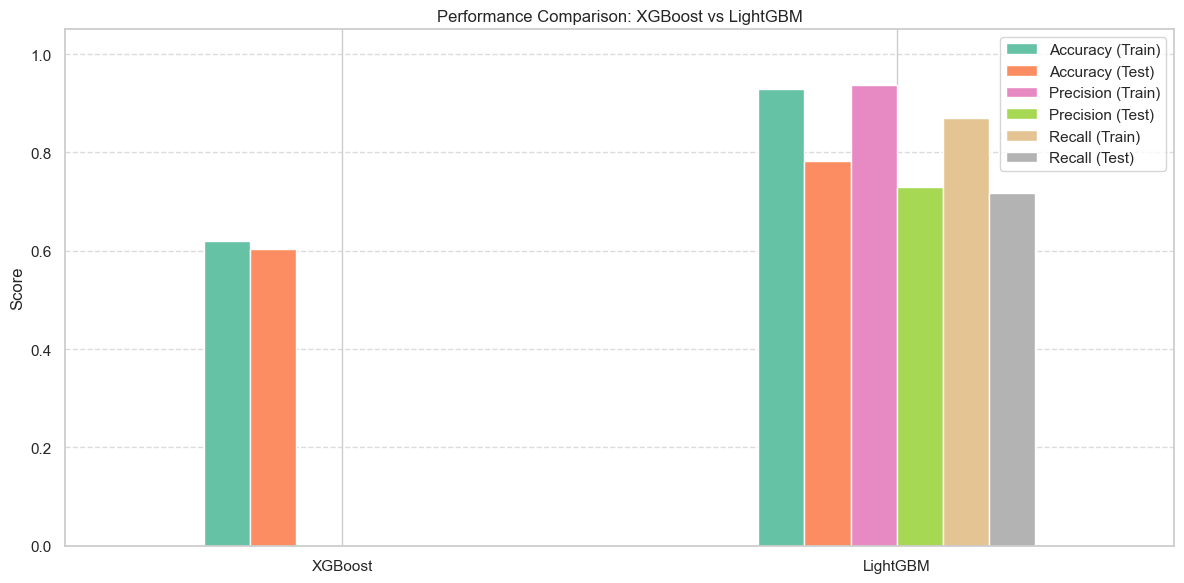

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Metrics  already calculated
metrics = {
    "Accuracy (Train)": [training_accuracy_xgb, training_accuracy_lgb],
    "Accuracy (Test)": [test_accuracy_xgb, test_accuracy_lgb],
    "Precision (Train)": [training_precision_xgb, training_precision_lgb],
    "Precision (Test)": [test_precision_xgb, test_precision_lgb],
    "Recall (Train)": [training_recall_xgb, training_recall_lgb],
    "Recall (Test)": [test_recall_xgb, test_recall_lgb]
}

# Create DataFrame
results_df = pd.DataFrame(metrics, index=["XGBoost", "LightGBM"])

# Plot
results_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Performance Comparison: XGBoost vs LightGBM')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Test DataSet

###  Exploratory Data Analysis (EDA):

In [29]:
#load the Data into DataFrame 
import numpy as np
import pandas as pd 
df =pd.read_csv(r"C:\Users\anura\Desktop\d\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [31]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

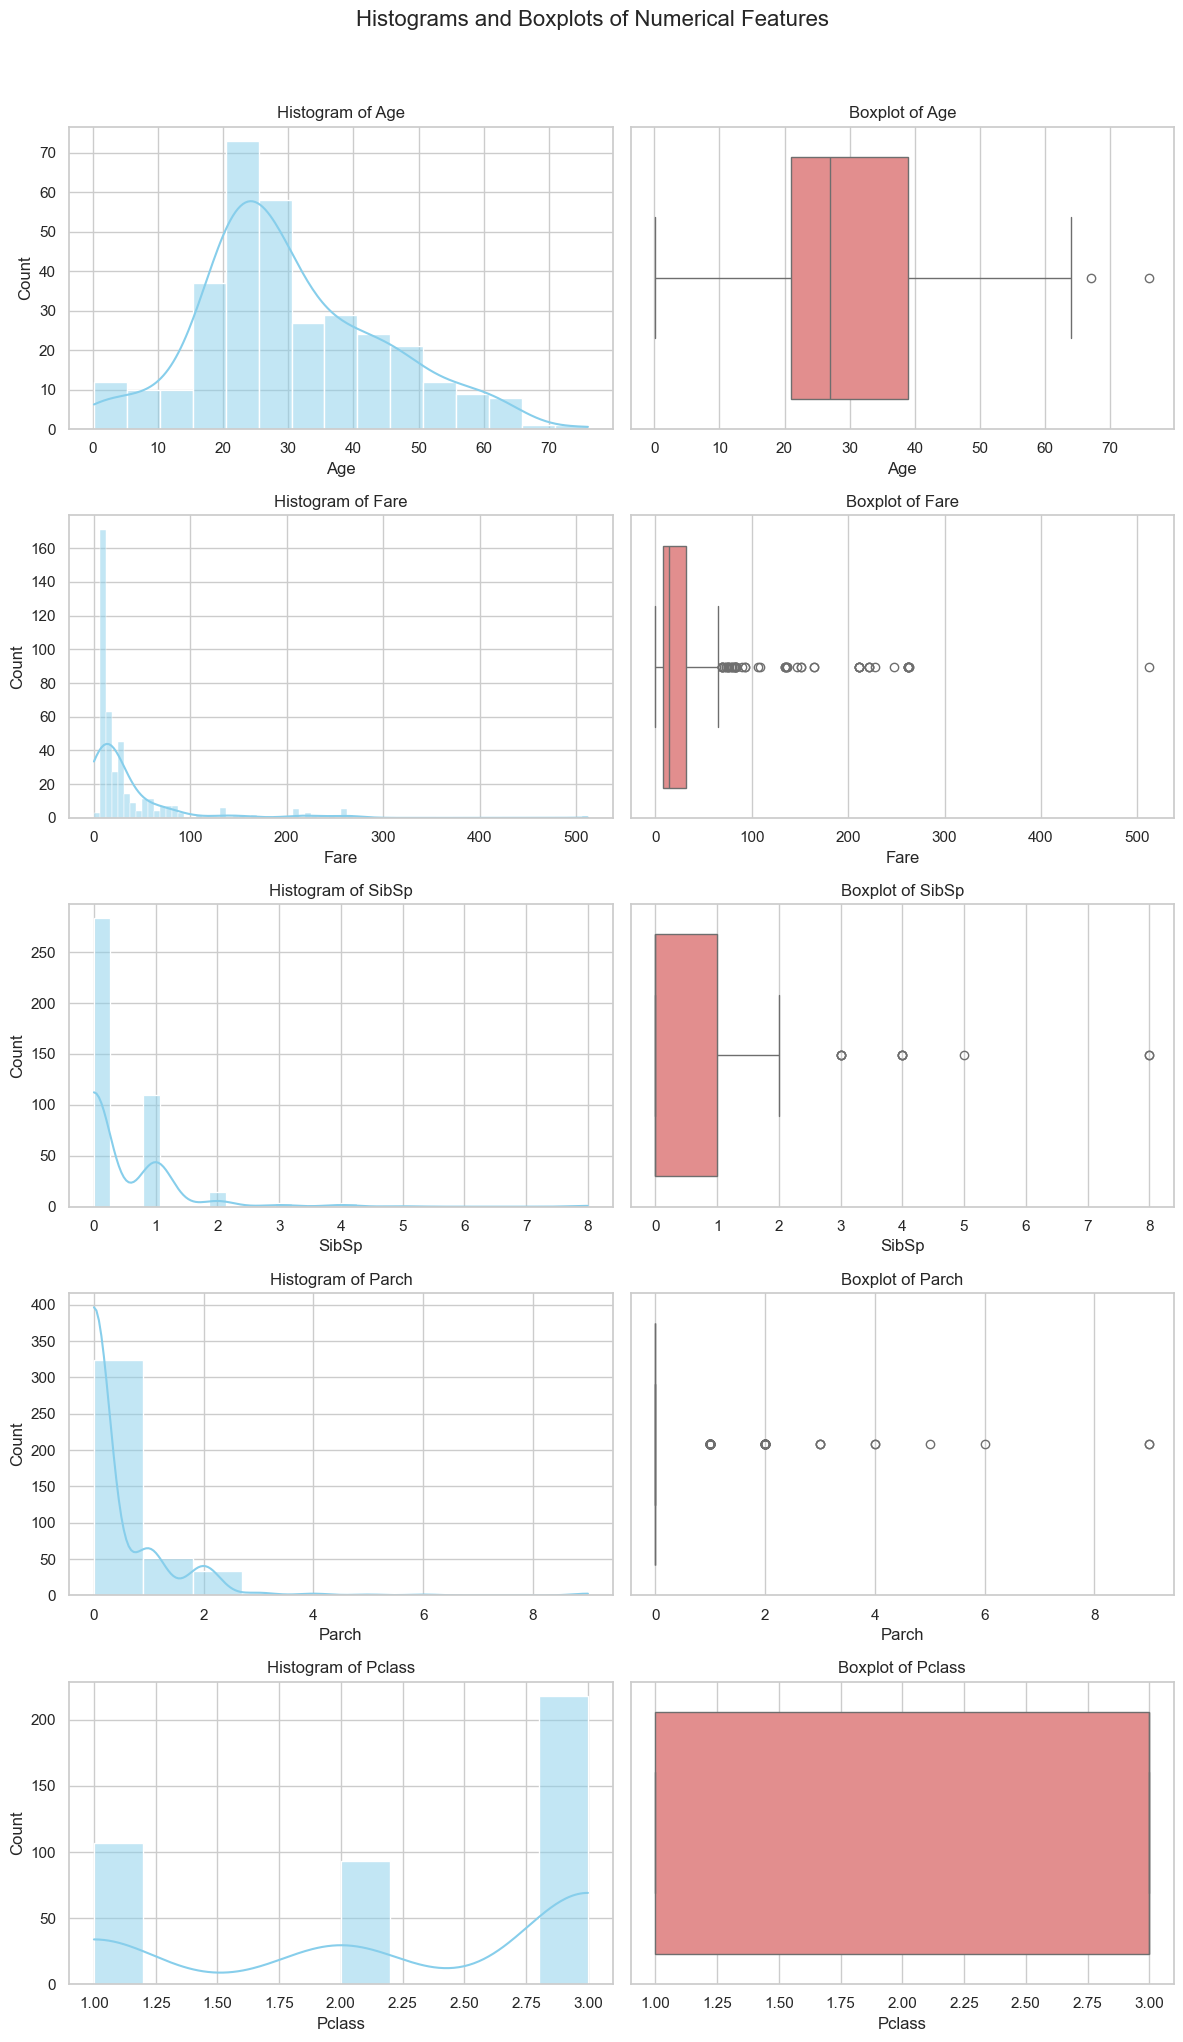

In [32]:
# Numerical columns to visualize
num_cols = ['Age', 'Fare', 'SibSp', 'Parch','Pclass']

# Histograms and boxplots
fig, axes = plt.subplots(len(num_cols), 2, figsize=(12, 4 * len(num_cols)))
fig.suptitle("Histograms and Boxplots of Numerical Features", fontsize=16, y=1.02)

for i, col in enumerate(num_cols):
    # Histogram
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"Histogram of {col}")
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


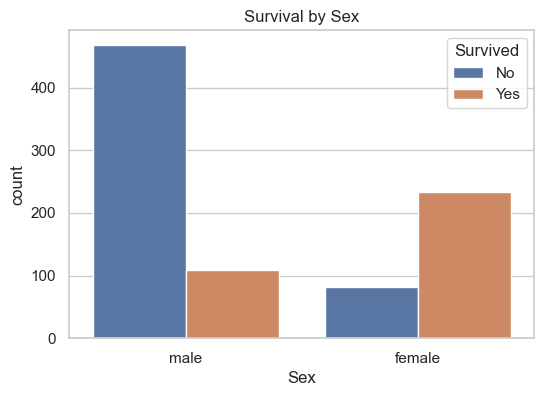

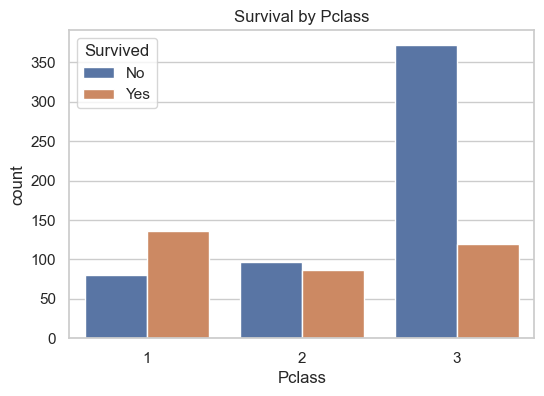

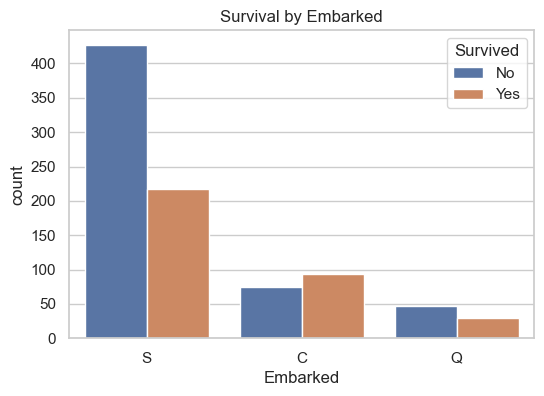

In [35]:
# Bar plots: Survival vs. Sex, Pclass, Embarked
cat_cols = ['Sex', 'Pclass', 'Embarked']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Survived')
    plt.title(f"Survival by {col}")
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.show()


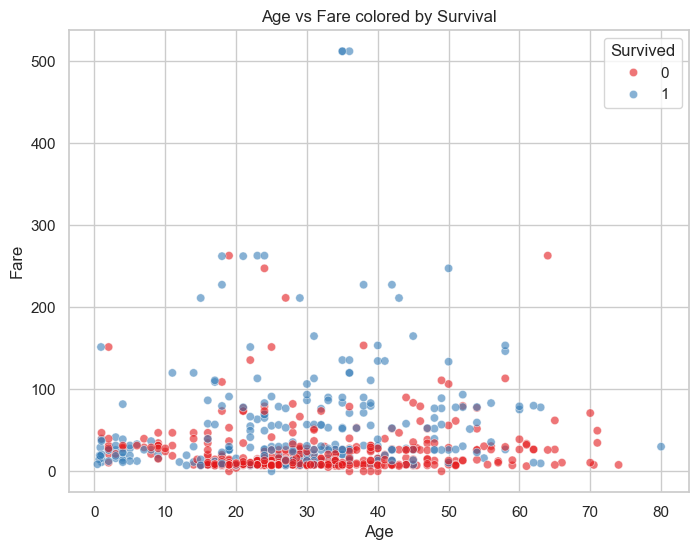

In [36]:
# Scatter plots: Age vs Fare, colored by survival
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='Set1', alpha=0.6)
plt.title("Age vs Fare colored by Survival")
plt.show()

### Data Preprocessing:

In [37]:
categorical_col =df.select_dtypes(include =["object"]).columns
categorical_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [38]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Name"]     =LE.fit_transform(df["Name"])
df["Sex"]      =LE.fit_transform(df["Sex"])
df["Ticket"]   =LE.fit_transform(df["Ticket"])
df["Cabin"]    =LE.fit_transform(df["Cabin"])
df["Embarked"] =LE.fit_transform(df["Embarked"])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [39]:
#fill missing values with Median or Mean 
df["Age"].fillna(df["Age"].median(), inplace =True)
df["Fare"].fillna(df["Fare"].median(), inplace =True)
df["Cabin"].fillna(df["Cabin"].median(), inplace =True) 

C:\Users\anura\AppData\Local\Temp\ipykernel_24032\3402056341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace =True)
C:\Users\anura\AppData\Local\Temp\ipykernel_24032\3402056341.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [40]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 66.3 KB


## Building Predictive Models:

In [42]:
Y =df["Survived"]
X =df.iloc[:, 0:]
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,28.0,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [43]:
#Data  partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X, Y, test_size =0.3)

In [44]:
#model fitting 
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [45]:
y_pred_train =model.predict(X_train)
y_pred_test  =model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

training_accuracy  =accuracy_score(Y_train, y_pred_train)
test_accuracy      =accuracy_score(Y_test, y_pred_test)
print("Training accuracy:", np.round(training_accuracy),2)
print("Test accuracy:", np.round(test_accuracy),2)

training_precision  =precision_score(Y_train, y_pred_train)
test_precision  =precision_score(Y_test, y_pred_test)
print("Training Precision:", np.round(training_precision),2)
print("Test Precision:", np.round(test_precision),2)

training_recall  =recall_score(Y_train, y_pred_train)
test_recall      =recall_score(Y_test, y_pred_test)
print("Training Recall:", np.round(training_recall),2)
print("Test Recall:", np.round(test_recall),2)

training_f1   =f1_score(Y_train, y_pred_train)
test_f1       =f1_score(Y_test, y_pred_test)
print("Traning F1:", np.round(training_f1),2)
print("Test F1:", np.round(test_f1),2)

Training accuracy: 1.0 2
Test accuracy: 1.0 2
Training Precision: 1.0 2
Test Precision: 1.0 2
Training Recall: 1.0 2
Test Recall: 1.0 2
Traning F1: 1.0 2
Test F1: 1.0 2


In [47]:
#gradient boosting classifier 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss

# Fit the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, Y_train)

# Predictions (labels)
y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

# Predictions (probabilities) — for log loss
y_proba_train_gb = gb_model.predict_proba(X_train)
y_proba_test_gb = gb_model.predict_proba(X_test)

# Accuracy
training_accuracy_gb = accuracy_score(Y_train, y_pred_train_gb)
test_accuracy_gb = accuracy_score(Y_test, y_pred_test_gb)

# Log Loss (using probabilities)
training_loss_gb = log_loss(Y_train, y_proba_train_gb)
test_loss_gb = log_loss(Y_test, y_proba_test_gb)

# Output
print("Gradient Boosting - Training Accuracy:", training_accuracy_gb)
print("Gradient Boosting - Test Accuracy:", test_accuracy_gb)
print("Gradient Boosting - Training Loss:", training_loss_gb)
print("Gradient Boosting - Test Loss:", test_loss_gb)

Gradient Boosting - Training Accuracy: 1.0
Gradient Boosting - Test Accuracy: 1.0
Gradient Boosting - Training Loss: 2.0814827985593795e-05
Gradient Boosting - Test Loss: 2.062690068164294e-05


In [48]:
##XGBoost models

import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import LabelEncoder

# Encode labels to start from 0 and be integers
le = LabelEncoder()
Y_train_enc = le.fit_transform(Y_train)
Y_test_enc = le.transform(Y_test)

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    gamma=100,
    reg_lambda=10,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, Y_train_enc)

# Predictions (class labels)
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Predictions (probabilities for log_loss)
y_proba_train_xgb = xgb_model.predict_proba(X_train)
y_proba_test_xgb = xgb_model.predict_proba(X_test)

# Accuracy
training_accuracy_xgb = accuracy_score(Y_train_enc, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(Y_test_enc, y_pred_test_xgb)

# Log loss
training_loss_xgb = log_loss(Y_train_enc, y_proba_train_xgb)
test_loss_xgb = log_loss(Y_test_enc, y_proba_test_xgb)

# Output
print("XGBoost - Training Accuracy:", training_accuracy_xgb)
print("XGBoost - Test Accuracy:", test_accuracy_xgb)
print("XGBoost - Training Loss:", training_loss_xgb)
print("XGBoost - Test Loss:", test_loss_xgb)

XGBoost - Training Accuracy: 1.0
XGBoost - Test Accuracy: 1.0
XGBoost - Training Loss: 0.16729112914760513
XGBoost - Test Loss: 0.1655460886170115


C:\Users\anura\anaconda5-3-25\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:55:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [49]:
##adaboost classifier with GradientBoostingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, log_loss

# AdaBoost Classifier
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate=0.1)
ab_model.fit(X_train, Y_train)

# Predicted class labels
y_pred_train_ab = ab_model.predict(X_train)
y_pred_test_ab = ab_model.predict(X_test)

# Predicted probabilities (for log loss)
y_proba_train_ab = ab_model.predict_proba(X_train)
y_proba_test_ab = ab_model.predict_proba(X_test)

# Accuracy scores
training_accuracy_ab = accuracy_score(Y_train, y_pred_train_ab)
test_accuracy_ab = accuracy_score(Y_test, y_pred_test_ab)

# Log loss (correct: using probabilities)
training_loss_ab = log_loss(Y_train, y_proba_train_ab)
test_loss_ab = log_loss(Y_test, y_proba_test_ab)

# Output
print("AdaBoost - Training Accuracy:", training_accuracy_ab)
print("AdaBoost - Test Accuracy:", test_accuracy_ab)
print("AdaBoost - Training Loss:", training_loss_ab)
print("AdaBoost - Test Loss:", test_loss_ab)

AdaBoost - Training Accuracy: 1.0
AdaBoost - Test Accuracy: 1.0
AdaBoost - Training Loss: 2.2204460492503136e-16
AdaBoost - Test Loss: 2.2204460492503136e-16


C:\Users\anura\anaconda5-3-25\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [50]:
#Cross validations

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import numpy as np

training_accuracy = []
test_accuracy     = []
training_loss     = []
test_loss         = []

for i in range(1, 501):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    model = GradientBoostingClassifier()  # Removed 'criterion' parameter
    model.fit(X_train, Y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    y_prob_train = model.predict_proba(X_train)
    y_prob_test  = model.predict_proba(X_test)

    training_accuracy.append(accuracy_score(Y_train, y_pred_train))
    test_accuracy.append(accuracy_score(Y_test, y_pred_test))

    training_loss.append(log_loss(Y_train, y_prob_train))
    test_loss.append(log_loss(Y_test, y_prob_test))

print("Cross validation: Training accuracy score:", np.round(np.mean(training_accuracy), 2))
print("Cross validation: Test accuracy score:",    np.round(np.mean(test_accuracy), 2))
print("Cross validation: Training loss:",          np.round(np.mean(training_loss), 2))
print("Cross validation: Test loss:",              np.round(np.mean(test_loss), 2))


Cross validation: Training accuracy score: 1.0
Cross validation: Test accuracy score: 1.0
Cross validation: Training loss: 0.0
Cross validation: Test loss: 0.0


In [51]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels to integers starting from 0
le = LabelEncoder()
Y_train_enc = le.fit_transform(Y_train)
Y_test_enc = le.transform(Y_test)

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    gamma=100,
    reg_lambda=10,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, Y_train_enc)

# Predictions (class labels)
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Accuracy
training_accuracy_xgb = accuracy_score(Y_train_enc, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(Y_test_enc, y_pred_test_xgb)

# Precision
training_precision_xgb = precision_score(Y_train_enc, y_pred_train_xgb)
test_precision_xgb = precision_score(Y_test_enc, y_pred_test_xgb)

# Recall 
training_recall_xgb = recall_score(Y_train_enc, y_pred_train_xgb)
test_recall_xgb = recall_score(Y_test_enc, y_pred_test_xgb)

# Output
print("XGBoost - Training Accuracy:", training_accuracy_xgb)
print("XGBoost - Test Accuracy:", test_accuracy_xgb)
print("XGBoost - Training Precision Score:", training_precision_xgb)
print("XGBoost - Test Precision Score:", test_precision_xgb)
print("XGBoost - Training Recall Score:", training_recall_xgb)
print("XGBoost - Test Recall Score:", test_recall_xgb)


XGBoost - Training Accuracy: 1.0
XGBoost - Test Accuracy: 1.0
XGBoost - Training Precision Score: 1.0
XGBoost - Test Precision Score: 1.0
XGBoost - Training Recall Score: 1.0
XGBoost - Test Recall Score: 1.0


C:\Users\anura\anaconda5-3-25\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:57:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Comparative Analysis:

In [52]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
Y_train_enc = le.fit_transform(Y_train)
Y_test_enc = le.transform(Y_test)

# ----- XGBoost Classifier -----
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    gamma=100,
    reg_lambda=10,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, Y_train_enc)

y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

training_accuracy_xgb = accuracy_score(Y_train_enc, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(Y_test_enc, y_pred_test_xgb)
training_precision_xgb = precision_score(Y_train_enc, y_pred_train_xgb)
test_precision_xgb = precision_score(Y_test_enc, y_pred_test_xgb)
training_recall_xgb = recall_score(Y_train_enc, y_pred_train_xgb)
test_recall_xgb = recall_score(Y_test_enc, y_pred_test_xgb)

print("===== XGBoost Results =====")
print("Training Accuracy:", training_accuracy_xgb)
print("Test Accuracy:", test_accuracy_xgb)
print("Training Precision:", training_precision_xgb)
print("Test Precision:", test_precision_xgb)
print("Training Recall:", training_recall_xgb)
print("Test Recall:", test_recall_xgb)

# ----- LightGBM Classifier -----
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    reg_lambda=10,
    random_state=42
)
lgb_model.fit(X_train, Y_train_enc)

y_pred_train_lgb = lgb_model.predict(X_train)
y_pred_test_lgb = lgb_model.predict(X_test)

training_accuracy_lgb = accuracy_score(Y_train_enc, y_pred_train_lgb)
test_accuracy_lgb = accuracy_score(Y_test_enc, y_pred_test_lgb)
training_precision_lgb = precision_score(Y_train_enc, y_pred_train_lgb)
test_precision_lgb = precision_score(Y_test_enc, y_pred_test_lgb)
training_recall_lgb = recall_score(Y_train_enc, y_pred_train_lgb)
test_recall_lgb = recall_score(Y_test_enc, y_pred_test_lgb)

print("\n===== LightGBM Results =====")
print("Training Accuracy:", training_accuracy_lgb)
print("Test Accuracy:", test_accuracy_lgb)
print("Training Precision:", training_precision_lgb)
print("Test Precision:", test_precision_lgb)
print("Training Recall:", training_recall_lgb)
print("Test Recall:", test_recall_lgb)


C:\Users\anura\anaconda5-3-25\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:57:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


===== XGBoost Results =====
Training Accuracy: 1.0
Test Accuracy: 1.0
Training Precision: 1.0
Test Precision: 1.0
Training Recall: 1.0
Test Recall: 1.0
[LightGBM] [Info] Number of positive: 271, number of negative: 441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 969
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380618 -> initscore=-0.486926
[LightGBM] [Info] Start training from score -0.486926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

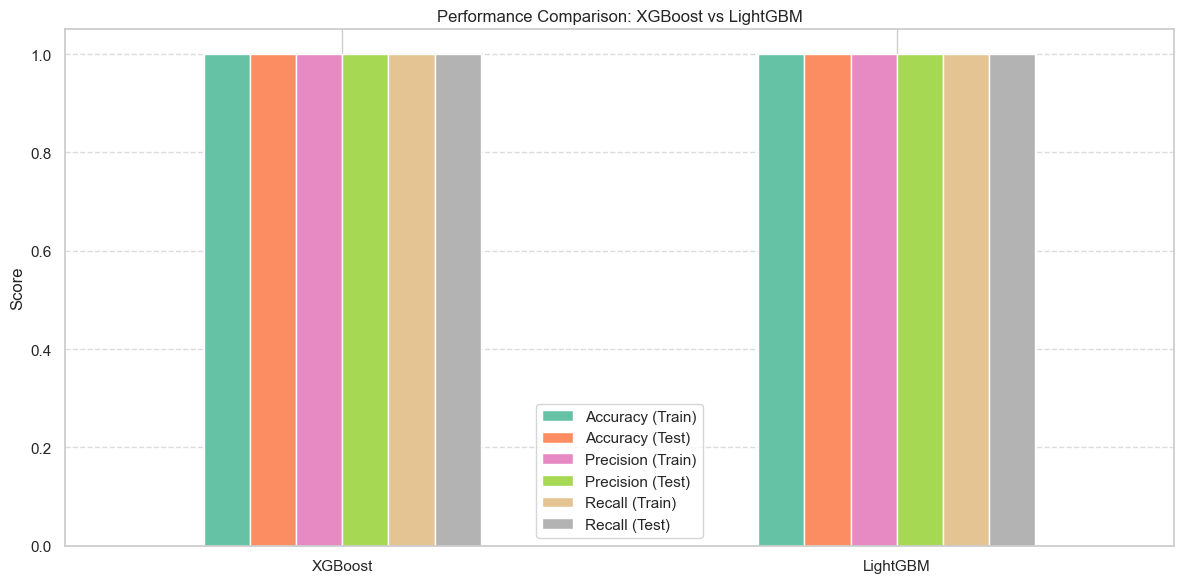

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Metrics  already calculated
metrics = {
    "Accuracy (Train)": [training_accuracy_xgb, training_accuracy_lgb],
    "Accuracy (Test)": [test_accuracy_xgb, test_accuracy_lgb],
    "Precision (Train)": [training_precision_xgb, training_precision_lgb],
    "Precision (Test)": [test_precision_xgb, test_precision_lgb],
    "Recall (Train)": [training_recall_xgb, training_recall_lgb],
    "Recall (Test)": [test_recall_xgb, test_recall_lgb]
}

# Create DataFrame
results_df = pd.DataFrame(metrics, index=["XGBoost", "LightGBM"])

# Plot
results_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Performance Comparison: XGBoost vs LightGBM')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
